# Laboratoire 2- méthode de MonteCarlo
### MATNA2
#### Alexandre Desfossés Foucault et Maxime Fagnan

***
### Travail remis par:
- Le marquis de l'Hôpital
- Karl Weierstrass
***

In [ ]:
# importation de librairies de base pour les graphiques
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches # dessins de formes quelconques (comme des rectangles)

***

In [ ]:
def montecarlo(f,a,b,n,representation_graphique=True):

    nb_points_sous_courbe = 0
    
    abscisses = np.linspace(a,b,1000) #utile pour trouver la valeur max de f sur [a,b]
    f_max = max(f(abscisses) ) #on trouve la valeur de la fonction pour créer un rectangle qui contient la courbe
    
    aire_rectangle = (b-a)*f_max #1 est la valeur maximale de la fonction sur [0,1] donc le rectangle [0,1]x[0,1] contient la courbe. ici f_max =1
    
    #les 4 listes suivantes vont permettre de visualiser les points
    under_curve_x = []
    under_curve_y = []
    above_curve_x = []
    above_curve_y = []
    
    for current_point in range(n):

        x = np.random.uniform(a, b)  # nombre aléatoire entre a et b
        y = np.random.uniform(0, f_max)  # nombre aléatoire entre 0 et f_max
        
        if y <= f(x):  # est-ce que le point est sous la courbe?
            nb_points_sous_courbe += 1
            under_curve_x.append(x) # pour faire le graphique
            under_curve_y.append(y)
        else:  # sinon le point est au dessus de la courbe.
            above_curve_x.append(x)
            above_curve_y.append(y)


    proportion_points_sous_courbe = nb_points_sous_courbe / n
    aire_sous_courbe = proportion_points_sous_courbe * aire_rectangle

    # Tracer le graphique, mais seulement si la variable representation_graphique est évaluer comme vraie
    if representation_graphique:
        # faire un beau graphique
        plt.figure(figsize=(8, 6))
        plt.scatter(under_curve_x, under_curve_y, color='green', s=5, label='Sous la courbe')
        plt.scatter(above_curve_x, above_curve_y, color='red', s=5, label='En haut de la courbe')
        plt.plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)), color='blue')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Approximation d''une aire sous la courbe en utilisant la méthode de MonteCarlo')
        plt.legend()
        plt.show()
        # imprimer la valeur qu'on va retourner.
        print("aire sous la courbe : ",aire_sous_courbe)

    return aire_sous_courbe

# On fait deux tests sur la fonction f(x)=sin(x) pour voir si notre programme fonctionne et est bien aléatoire
def f(x):
    return np.sin(x)
# n = 1000  (plus on prend de points, plus c'est précis)
# a = 0
# b = pi
# representation_graphique = True
montecarlo(f,0,np.pi,1000, True)


***

#### Question 1
Utilisez la méthode des rectangles à gauche et la méthode de montecarlo pour approximer l'aire sous la courbe de la fonction $f(x)=e^{-x^2}$ pour $x \in [-1,1]$. 

*Utilisez 1000 rectangles dans la méthode des rectangles et 1000 points dans la méthode de Monte-Carlo.*

Utilisez `np.exp(chose)` pour $e^{chose}$.
Voici référence: https://numpy.org/doc/stable/reference/generated/numpy.exp.html



In [ ]:
# Définissez la bonne fonction
def f(x):
    return 0 # Changez cette valeur

In [ ]:
# Cellule pour collez la fonction rectangle_gauche(f,a,b,n,representation_graphique):



In [ ]:
# Calculez l'aire avec les deux méthodes (100 rectangles et 100 points avec representation_graphique = True).
# Utilisez les paramètres appropriés

# montecarlo()
# rectangle_gauche()

#### Question 2
Faites un graphique de l'**erreur** en fonction du **nombre de points $\boldsymbol n$**, soit $\boldsymbol{E(n)}$, lors de l'approximation d'aire avec la méthode de Montecarlo.

Dans cette question, approximez l'aire sous la courbe de $f(x)=x^2$ sur l'intervalle $x\in[0,1]$.

C'est à dire, pour $n\in\{10, 11, 12, \dots, 200\}$, calculez la différence entre l'approximation de Monte-Carlo et la valeur exacte de l'aire.

In [ ]:
# Définissez la bonne fonction
def f(x):
    return 0      # Changez le 0 pour la règle appropriée


###################################################################################################

# Vous devez réparer deux lignes dans la fonction qui trace E(n)
def graphique_erreur_en_fonction_de_n_dans_montecarlo(min_n, max_n, aire_exacte, f, a, b):
    # notez que les trois derniers paramètres sont ceux nécéssaires pour la fonction montecarlo()
    liste_de_n = range(min_n, max_n) # liste de nb_points
    liste_erreurs = [] # liste de E(nb_points) : on calcule l'erreur pour différents nombre de points et on stocke chaque erreur dans cette liste
    
    for n in liste_de_n: # pour tous les n qui nous intéressent
    
        # Modifiez: Faites une approximation en utilisant la fonction montecarlo() avec le dernier paramètre representation_graphique=False
        approx = 0
        
        # Modifiez: Calculez la différence entre l'approximation et l'aire exacte
        erreur = 0
        
        liste_erreurs.append(erreur) # on rajoute l'erreur calculée avec un certain nombre de points à cette liste

    # Je trace le graphique pour vous:
    plt.plot(liste_de_n,liste_erreurs)
    plt.title("Erreur en fonction du nombre de points")

###################################################################################################

# Ici on trace l'erreur pour 10 à 200 points.

min_n = 10
max_n = 200
aire_exacte = 0 # Calculez l'aire exacte sous f(x) à la main pour x entre 0 et 3
# f est définie plus haut
a = 0
b = 3

graphique_erreur_en_fonction_de_n_dans_montecarlo(min_n, max_n, aire_exacte, f, a, b)
plt.plot(np.linspace(min_n,max_n,100),[0]*100, "g--")
plt.legend(["Erreur en fonction du nombre de points (Monte Carlo)", "Erreur d'une intégrale exacte"])

#### Question 3
Réparez la fonction graphique_erreur_en_fonction_de_n_dans_rectangles(). Cette fonction fait apparaître un graphique de l'erreur d'estimation lorsqu'on utilise un nombre fini $n$ de rectangles au lieu d'une infinité. 

In [ ]:
# Réparer les deux lignes pour dans la fonction qui trace E(n) pour la méthode des rectangles.
def graphique_erreur_en_fonction_de_n_dans_rectangles(min_n, max_n, aire_exacte, f, a, b):
    # notez que les trois derniers paramètres sont ceux nécéssaires pour la fonction methode_rectangle_gauche()
    liste_de_n = range(min_n, max_n) # liste de nb_points
    liste_erreurs = [] # liste de E(nb_points) : on calcule l'erreur pour différents nombre de points et on stocke chaque erreur dans cette liste
    
    for n in liste_de_n: # pour tous les n qui nous intéressent
    
        # Modifiez: Faites une approximation en utilisant la fonction rectangle_gauche() avec le dernier paramètre representation_graphique=False
        approx = 0 
    
        # Modifiez: Calculez la différence entre l'approximation et l'aire exacte
        erreur = 0
        
        liste_erreurs.append(erreur) # on rajoute l'erreur calculée avec un certain nombre de points à cette liste

    # Je trace le graphique pour vous:
    plt.plot(liste_de_n,liste_erreurs)
    plt.title("Erreur en fonction du nombre de rectangles")

In [ ]:
# Executez la cellule pour comparer les deux méthodes.
def f(x):
    return x**2
a = 0
b = 3

# Tous les paramètres ont déjà été définies dans la question 2.
graphique_erreur_en_fonction_de_n_dans_montecarlo(min_n, max_n, aire_exacte, f, a, b)
graphique_erreur_en_fonction_de_n_dans_rectangles(min_n, max_n, aire_exacte, f, a, b)
plt.plot(np.linspace(min_n,max_n,100),[0]*100, "g--")
plt.title("Comparaison de l'erreur d'intégration avec deux techniques d'approximations numériques de l'intégrale définie")
plt.legend(["Erreur en fonction du nombre de points (Monte Carlo)", "Erreur en fonction du nombre de rectangles", "Erreur d'une intégrale exacte"])


#### Question 4
Selon vos observations, laquelle de ces méthodes nécessite le plus petit n pour avoir une précision donnée?

#### Question 5
Utilisez la méthode de Montecarlo pour approximer le volume engendré par la rotation de la région fermée entre les courbes $y=\arctan x$ et $y=\frac{\pi x}{4}$ pour $x \in [0,1]$ autour de l'axe de rotation y = -1.

Voir référence numpy.

*Votre aproximation devrait-être près de $0.41$ .*

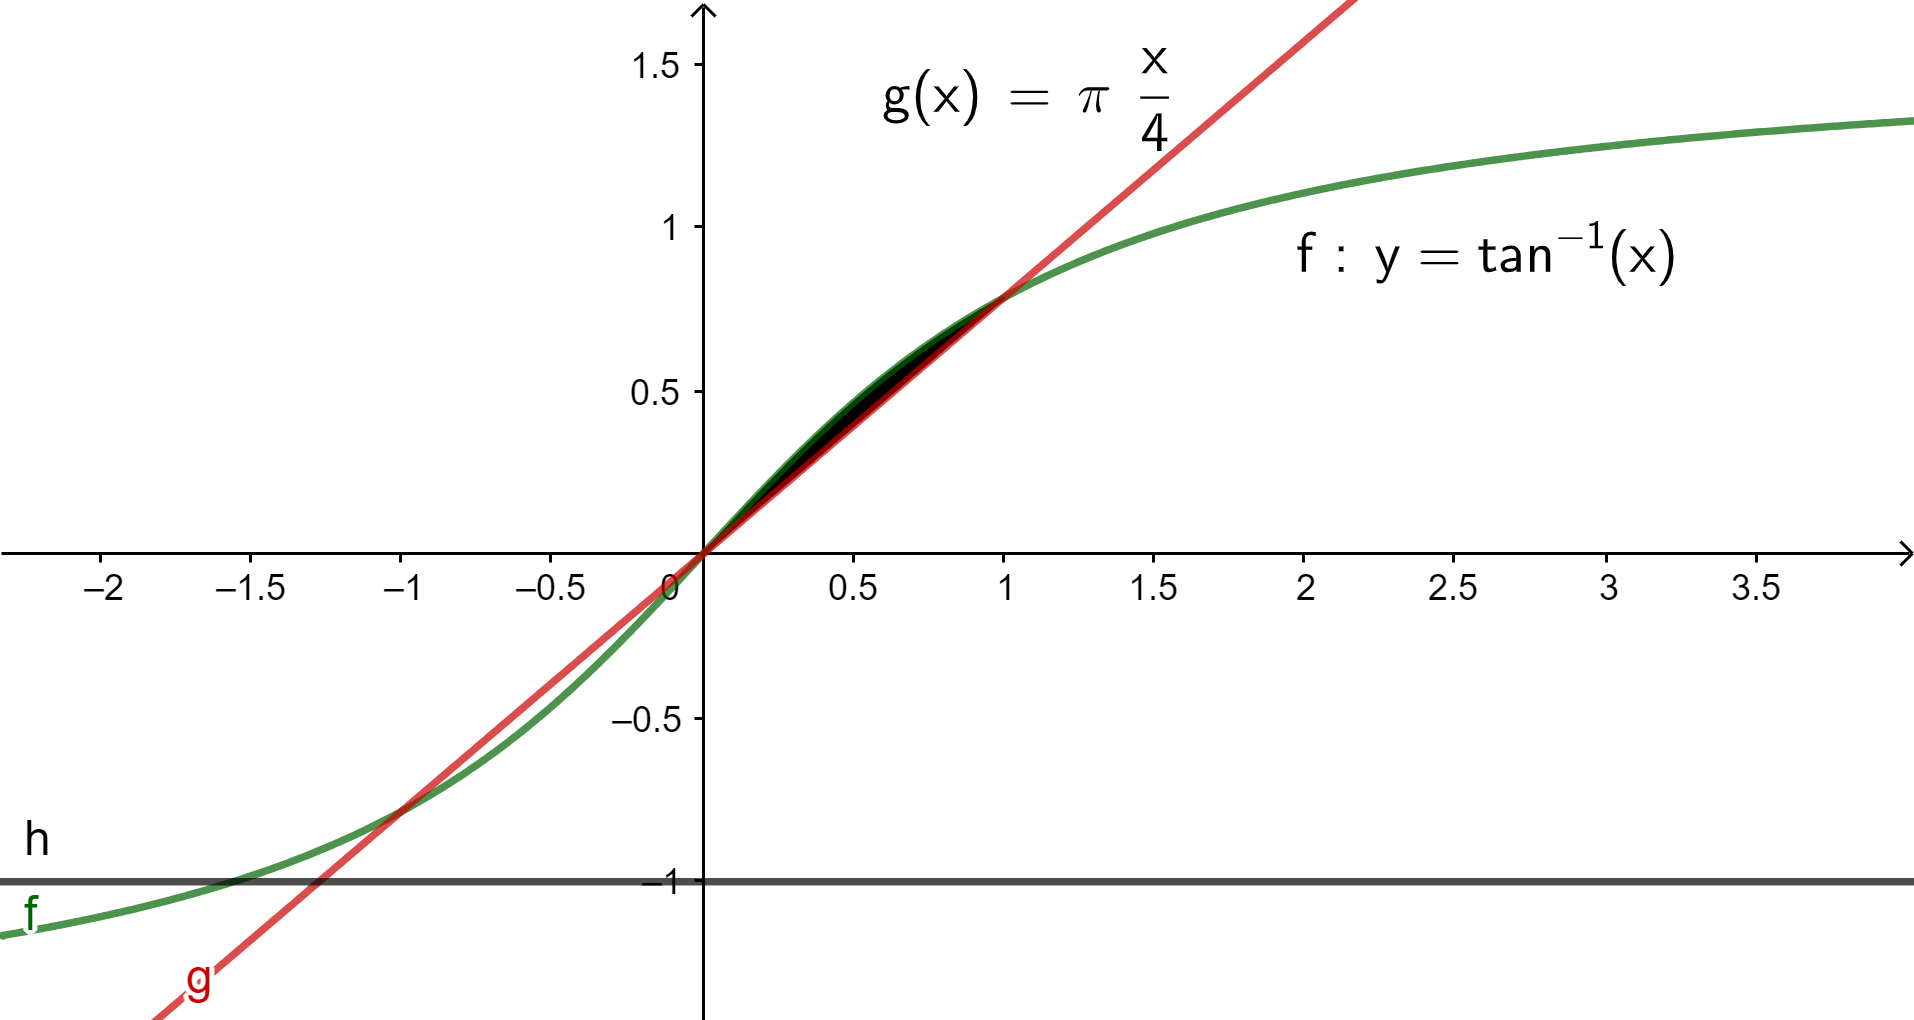

In [ ]:
# Définissez la bonne fonction à intégrer
def f(x):
    return 1 # Changez cette valeur

In [ ]:
# Appelez la méthode de Monte-Carlo avec les paramètres appropriés. representation_graphique = True

# montecarlo()
# votre réponse devrait se situer entre 0.3 et 